<a href="https://colab.research.google.com/github/thongle28625/ttnt/blob/main/BAOCAO3_TOMAU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Thực Hành Trí Tuệ Nhân Tạo Buổi 4**

**Bài 1:** Phát triển code bài tập mẫu để đọc file ma trận kề dạng txt bất kỳ và in kết quả tô
màu ra màn hình.

--- NHẬP MA TRẬN KỀ ---
Nhập số lượng đỉnh (N): 5
Các đỉnh của đồ thị sẽ là: A, B, C, D, E
Vui lòng nhập ma trận kề (N x N), mỗi hàng cách nhau bởi dấu cách (chỉ 0 hoặc 1):
Nhập hàng A: 0 1 1 1 1 
Nhập hàng B: 1 0 0 0 0 
Nhập hàng C: 1 0 0 0 0
Nhập hàng D: 1 0 0 0 0 
Nhập hàng E: 1 0 0 0 0

--- NHẬP DANH SÁCH MÀU KHẢ DỤNG ---
Màu hỗ trợ: Đỏ, Xanh lá, Vàng, Xanh dương, Tím, Cam, Hồng, Nâu, Trắng, Đen, Xám, Lục lam, Magenta, Lime
Nhập danh sách màu (phân tách bởi dấu phẩy, ví dụ: Đỏ, Xanh lá, Vàng, Xanh dương): Đỏ, Vàng, Xanh lá, Tím, Xanh dương

BẮT ĐẦU CHẠY THUẬT TOÁN TÔ MÀU THAM LAM...
--------------------------------------------------
THÔNG TIN ĐỒ THỊ VÀ KẾT QUẢ TÔ MÀU:
Các đỉnh: ['A', 'B', 'C', 'D', 'E']
Bậc của các đỉnh: [('A', 4), ('B', 1), ('C', 1), ('D', 1), ('E', 1)]

KẾT QUẢ TÔ MÀU CUỐI CÙNG:
  Đỉnh A (Bậc 4): Màu Đỏ
  Đỉnh B (Bậc 1): Màu Vàng
  Đỉnh C (Bậc 1): Màu Vàng
  Đỉnh D (Bậc 1): Màu Vàng
  Đỉnh E (Bậc 1): Màu Vàng
--------------------------------------------------
TỔN

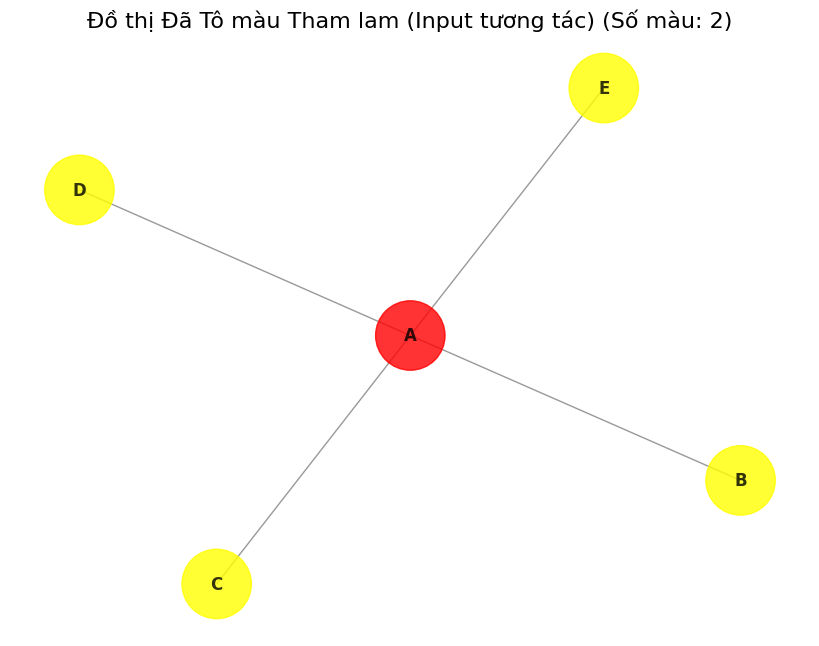

In [16]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from typing import List, Dict, Tuple, Optional, Set

# Định nghĩa các màu khả dụng mặc định cho người dùng tiện nhập
MAU_KHA_DUNG_MAC_DINH = ["Đỏ", "Xanh lá", "Vàng", "Xanh dương", "Tím", "Cam", "Hồng", "Nâu"]

class ToMauDoThiThamLam:
    """
    Lớp chính thực hiện thuật toán Tô màu Đồ thị Tham lam (Greedy Graph Coloring).
    """
    # Từ điển ánh xạ tên màu tiếng Việt sang mã màu Matplotlib (Tiếng Anh) để vẽ đồ thị
    ANH_XA_MAU = {
        "Đỏ": 'red', "Xanh lá": 'green', "Vàng": 'yellow', "Xanh dương": 'blue',
        "Tím": 'purple', "Cam": 'orange', "Hồng": 'pink', "Nâu": 'brown',
        "Trắng": 'white', "Đen": 'black', "Xám": 'gray', "Lục lam": 'cyan',
        "Magenta": 'magenta', "Lime": 'lime'
    }

    def __init__(self, ma_tran_ke: List[List[int]], mau_kha_dung: Optional[List[str]] = None):
        """Khởi tạo đối tượng tô màu đồ thị."""
        if not ma_tran_ke:
            raise ValueError("Ma trận kề không được rỗng.")

        self.ma_tran_ke = ma_tran_ke
        self.so_dinh = len(ma_tran_ke)
        # Tên đỉnh mặc định là A, B, C, ... (dựa trên mã ASCII)
        self.ten_dinh = [chr(65 + i) for i in range(self.so_dinh)]
        # Ánh xạ tên đỉnh sang chỉ số (ví dụ: 'A' -> 0, 'B' -> 1)
        self.dinh_sang_chi_so = {ten: i for i, ten in enumerate(self.ten_dinh)}
        # Tính bậc của mỗi đỉnh
        self.bac_dinh = self._tinh_bac_dinh()

        # Thiết lập danh sách màu khả dụng gốc, chỉ giữ lại màu có thể vẽ được
        if mau_kha_dung is None:
            mau_kha_dung = MAU_KHA_DUNG_MAC_DINH
        self.mau_kha_dung_goc = [m for m in mau_kha_dung if m in self.ANH_XA_MAU]
        if not self.mau_kha_dung_goc:
             raise ValueError("Không có màu khả dụng nào được hỗ trợ để vẽ.")

        # Kết quả tô màu cuối cùng: {Tên đỉnh: Màu}
        self.ket_qua_to_mau: Dict[str, str] = {}
        self.so_mau_su_dung: int = 0
        # Theo dõi các màu CÓ THỂ dùng cho mỗi đỉnh trong quá trình tô màu
        self.mau_kha_dung_moi_dinh: Dict[str, List[str]] = {}

    # --- Phương thức Hỗ trợ ---

    def _tinh_bac_dinh(self) -> List[int]:
        """Tính bậc (degree) của mỗi đỉnh bằng cách tính tổng mỗi hàng."""
        return [sum(hang) for hang in self.ma_tran_ke]

    def _sap_xep_dinh(self, dinh_chua_to: Set[str]) -> List[str]:
        """Sắp xếp các đỉnh CHƯA TÔ theo Bậc Giảm dần (Nguyên tắc Tham lam)."""
        du_lieu_dinh = []
        for i, ten in enumerate(self.ten_dinh):
            if ten in dinh_chua_to:
                du_lieu_dinh.append((self.bac_dinh[i], i))
        # Sắp xếp theo bậc (x[0]) giảm dần
        du_lieu_dinh.sort(key=lambda x: x[0], reverse=True)
        return [self.ten_dinh[chi_so] for _, chi_so in du_lieu_dinh]

    def _chon_mau_cho_dinh(self, ten_dinh: str) -> str:
        """Chọn màu đầu tiên khả dụng từ danh sách cho đỉnh hiện tại."""
        mau_kha_dung = self.mau_kha_dung_moi_dinh.get(ten_dinh, [])
        # Nếu còn màu, chọn màu đầu tiên. Nếu hết màu, dùng "Xám" (mặc định để vẽ)
        return mau_kha_dung[0] if mau_kha_dung else "Xám"

    def _cap_nhat_mau_dinh_ke(self, chi_so_dinh_hien_tai: int, mau_da_chon: str, dinh_chua_to: Set[str]):
        """Loại bỏ màu đã chọn khỏi danh sách khả dụng của các đỉnh kề CHƯA TÔ."""
        for chi_so_dinh_ke in range(self.so_dinh):
            # Kiểm tra nếu hai đỉnh kề nhau
            if self.ma_tran_ke[chi_so_dinh_hien_tai][chi_so_dinh_ke] == 1:
                ten_dinh_ke = self.ten_dinh[chi_so_dinh_ke]
                # Chỉ cập nhật cho các đỉnh chưa tô màu
                if ten_dinh_ke in dinh_chua_to:
                    if mau_da_chon in self.mau_kha_dung_moi_dinh[ten_dinh_ke]:
                        self.mau_kha_dung_moi_dinh[ten_dinh_ke].remove(mau_da_chon)

    # --- Phương thức Chính ---

    def thuc_hien_to_mau(self) -> Tuple[Dict[str, str], int]:
        """Thực hiện toàn bộ thuật toán Tô màu Tham lam."""

        # Khởi tạo: Ban đầu tất cả các đỉnh đều có đủ các màu khả dụng
        self.mau_kha_dung_moi_dinh = {ten: self.mau_kha_dung_goc.copy() for ten in self.ten_dinh}

        # Nếu có tính năng Tô màu trước, phần này sẽ được xử lý ở đây
        dinh_da_to = set(self.ket_qua_to_mau.keys())
        dinh_chua_to = set(self.ten_dinh) - dinh_da_to

        # Bước 1. Cập nhật màu khả dụng dựa trên các đỉnh đã tô trước (nếu có)
        for ten_dinh_da_to, mau_da_chon in self.ket_qua_to_mau.items():
            chi_so = self.dinh_sang_chi_so[ten_dinh_da_to]
            self._cap_nhat_mau_dinh_ke(chi_so, mau_da_chon, dinh_chua_to)

        # Bước 2. Sắp xếp Đỉnh CHƯA TÔ còn lại theo Bậc Giảm dần
        dinh_da_sap_xep_con_lai = self._sap_xep_dinh(dinh_chua_to)

        # Bước 3. Lặp qua các đỉnh đã sắp xếp và tô màu
        for ten_dinh_hien_tai in dinh_da_sap_xep_con_lai:
            chi_so_hien_tai = self.dinh_sang_chi_so[ten_dinh_hien_tai]

            # Chọn màu khả dụng đầu tiên cho đỉnh hiện tại
            mau_duoc_chon = self._chon_mau_cho_dinh(ten_dinh_hien_tai)
            self.ket_qua_to_mau[ten_dinh_hien_tai] = mau_duoc_chon

            # Cập nhật các đỉnh còn lại (loại bỏ màu vừa dùng khỏi đỉnh kề)
            dinh_chua_to_sau_buoc_nay = dinh_chua_to - {ten_dinh_hien_tai}
            self._cap_nhat_mau_dinh_ke(chi_so_hien_tai, mau_duoc_chon, dinh_chua_to_sau_buoc_nay)

        # Đếm tổng số màu duy nhất đã được sử dụng
        self.so_mau_su_dung = len(set(self.ket_qua_to_mau.values()))
        return self.ket_qua_to_mau, self.so_mau_su_dung

    # --- Phương thức Hiển thị và Vẽ ---

    def in_ket_qua(self):
        """In thông tin kết quả tô màu ra màn hình console."""
        print("-" * 50)
        print("THÔNG TIN ĐỒ THỊ VÀ KẾT QUẢ TÔ MÀU:")
        print(f"Các đỉnh: {self.ten_dinh}")
        print(f"Bậc của các đỉnh: {list(zip(self.ten_dinh, self.bac_dinh))}")

        print("\nKẾT QUẢ TÔ MÀU CUỐI CÙNG:")
        dinh_sorted = sorted(self.ket_qua_to_mau.keys())
        for dinh in dinh_sorted:
            mau = self.ket_qua_to_mau[dinh]
            bac = self.bac_dinh[self.dinh_sang_chi_so[dinh]]
            print(f"  Đỉnh {dinh} (Bậc {bac}): Màu {mau}")

        print("-" * 50)
        print(f"TỔNG SỐ MÀU ĐÃ SỬ DỤNG: {self.so_mau_su_dung}")
        print("-" * 50)

    def ve_do_thi(self, title: str = "Đồ thị đã được Tô màu"):
        """Vẽ đồ thị đã tô màu bằng NetworkX và Matplotlib."""
        if not self.ket_qua_to_mau:
            print("Lỗi: Chưa thực hiện tô màu.")
            return

        try:
            # Chuyển ma trận kề sang đối tượng đồ thị NetworkX
            G_nx = nx.from_numpy_array(np.array(self.ma_tran_ke))
            mau_ve = []
            for i in range(self.so_dinh):
                ten_dinh_hien_tai = chr(65 + i)
                mau_tieng_viet = self.ket_qua_to_mau.get(ten_dinh_hien_tai, 'Xám')
                # Ánh xạ từ tên tiếng Việt sang mã màu Matplotlib
                mau_mpl = self.ANH_XA_MAU.get(mau_tieng_viet, 'gray')
                mau_ve.append(mau_mpl)

            # Xác định vị trí các đỉnh (dùng thuật toán bố cục spring_layout)
            pos = nx.spring_layout(G_nx, seed=42)

            plt.figure(figsize=(8, 6))
            nx.draw(
                G_nx, pos, with_labels=True,
                labels={i: self.ten_dinh[i] for i in range(self.so_dinh)},
                node_color=mau_ve, # Mảng màu đã tô để vẽ
                node_size=2500, font_color='black',
                font_weight='bold', edge_color='gray', linewidths=1, alpha=0.8
            )
            plt.title(f"{title} (Số màu: {self.so_mau_su_dung})", fontsize=16)
            plt.show()

        except ImportError:
            print("\nCẢNH BÁO: Không thể vẽ đồ thị. Thiếu thư viện NetworkX/Matplotlib.")
        except Exception as e:
            print(f"\nLỗi khi vẽ đồ thị: {e}")

# --- Hàm Tương tác Nhập liệu ---

def nhap_ma_tran_ke_tuong_tac() -> Optional[List[List[int]]]:
    """Hàm cho phép người dùng nhập ma trận kề từ console."""
    print("--- NHẬP MA TRẬN KỀ ---")

    # Bước 1: Nhập số đỉnh (N)
    while True:
        try:
            so_dinh_str = input("Nhập số lượng đỉnh (N): ")
            so_dinh = int(so_dinh_str)
            if so_dinh <= 0:
                print("Số đỉnh phải là số nguyên dương.")
                continue
            break
        except ValueError:
            print("Vui lòng nhập một số nguyên hợp lệ.")

    print(f"Các đỉnh của đồ thị sẽ là: {', '.join([chr(65 + i) for i in range(so_dinh)])}")
    print("Vui lòng nhập ma trận kề (N x N), mỗi hàng cách nhau bởi dấu cách (chỉ 0 hoặc 1):")

    # Bước 2: Nhập từng hàng ma trận
    ma_tran = []
    for i in range(so_dinh):
        while True:
            try:
                hang_str = input(f"Nhập hàng {chr(65 + i)}: ")
                hang = [int(x) for x in hang_str.split()]

                # Kiểm tra kích thước và giá trị
                if len(hang) != so_dinh:
                    print(f"Lỗi: Hàng phải có đúng {so_dinh} phần tử.")
                    continue
                if any(x not in (0, 1) for x in hang):
                    print("Lỗi: Các phần tử phải là số 0 hoặc 1.")
                    continue

                ma_tran.append(hang)
                break
            except ValueError:
                print("Lỗi: Các phần tử phải là số 0 hoặc 1.")

    # Kiểm tra tính đối xứng (chỉ là cảnh báo, không chặn chương trình)
    if not np.allclose(np.array(ma_tran), np.array(ma_tran).T):
        print("CẢNH BÁO: Ma trận không đối xứng (không phải đồ thị vô hướng). Chương trình sẽ tiếp tục.")

    return ma_tran

def nhap_mau_kha_dung_tuong_tac() -> List[str]:
    """Hàm cho phép người dùng nhập danh sách màu khả dụng và lọc màu không hỗ trợ."""
    print("\n--- NHẬP DANH SÁCH MÀU KHẢ DỤNG ---")
    mau_ho_tro = ', '.join(ToMauDoThiThamLam.ANH_XA_MAU.keys())
    print(f"Màu hỗ trợ: {mau_ho_tro}")
    mau_mac_dinh = "Đỏ, Xanh lá, Vàng, Xanh dương"

    mau_str = input(f"Nhập danh sách màu (phân tách bởi dấu phẩy, ví dụ: {mau_mac_dinh}): ")
    if not mau_str.strip():
        print("Sử dụng danh sách màu mặc định.")
        mau_nhap = [m.strip() for m in mau_mac_dinh.split(',')]
    else:
        mau_nhap = [m.strip() for m in mau_str.split(',') if m.strip()]

    # Lọc chỉ giữ lại màu có trong từ điển ánh xạ (ANH_XA_MAU)
    mau_hop_le = [m for m in mau_nhap if m in ToMauDoThiThamLam.ANH_XA_MAU]

    if len(mau_hop_le) < len(mau_nhap):
        mau_bi_loai = set(mau_nhap) - set(mau_hop_le)
        print(f"CẢNH BÁO: Các màu sau không được hỗ trợ để vẽ và sẽ bị loại: {', '.join(mau_bi_loai)}.")

    return mau_hop_le

# --- Thực thi Chính (Entry point) ---

if __name__ == "__main__":

    # 1. Nhập Ma trận Kề Tương tác
    ma_tran_ke = nhap_ma_tran_ke_tuong_tac()

    if ma_tran_ke is None or not ma_tran_ke:
        print("\nChương trình kết thúc.")
    else:
        # 2. Nhập Danh sách Màu Tương tác
        mau_kha_dung = nhap_mau_kha_dung_tuong_tac()

        if not mau_kha_dung:
             print("\nChương trình kết thúc do không có màu khả dụng.")
        else:
            # 3. Khởi tạo đối tượng và bắt đầu tô màu
            try:
                to_mau_graph = ToMauDoThiThamLam(
                    ma_tran_ke=ma_tran_ke,
                    mau_kha_dung=mau_kha_dung
                )

                # 4. Thực hiện thuật toán tô màu
                print("\nBẮT ĐẦU CHẠY THUẬT TOÁN TÔ MÀU THAM LAM...")
                to_mau_graph.thuc_hien_to_mau()

                # 5. Hiển thị Kết quả
                to_mau_graph.in_ket_qua()
                to_mau_graph.ve_do_thi("Đồ thị Đã Tô màu Tham lam (Input tương tác)")

            except ValueError as e:
                print(f"\nLỗi khởi tạo: {e}")

**Bài 2**: Cài đặt thuật toán người bán hàng và ứng dụng tìm chu trình qua n thành phố mỗi
thành phố qua 1 lần với chi phí tối thiểu.

  ỨNG DỤNG TSP (OOP) - TÌM CHU TRÌNH TỐI ƯU (HELD-KARP) 
 DANH SÁCH CÁC THÀNH PHỐ:
   [0]: TP. Hồ Chí Minh
   [1]: Đà Nẵng
   [2]: Hà Nội
   [3]: Cần Thơ
 Nhập CHỈ SỐ ĐỈNH XUẤT PHÁT (0 đến 3): 1

 Vị trí Xuất phát đã chọn: Đà Nẵng
--------------------------------------------------

BẮT ĐẦU CHẠY THUẬT TOÁN HELD-KARP...

--- KẾT QUẢ TỔNG QUAN ---
 Chi phí Tối thiểu của Chu trình: 440
Chu trình Tối ưu: Đà Nẵng -> Hà Nội -> Cần Thơ -> TP. Hồ Chí Minh -> Đà Nẵng

--- CHI TIẾT ĐƯỜNG ĐI TỐI ƯU ---
Bước 1: Di chuyển từ Đà Nẵng đến Hà Nội (Chi phí: 70)
Bước 2: Di chuyển từ Hà Nội đến Cần Thơ (Chi phí: 120)
Bước 3: Di chuyển từ Cần Thơ đến TP. Hồ Chí Minh (Chi phí: 150)
Bước 4: Di chuyển từ TP. Hồ Chí Minh đến Đà Nẵng (Chi phí: 100)
--------------------------------------------------

 Đang tạo và hiển thị đồ thị với chu trình tối ưu...


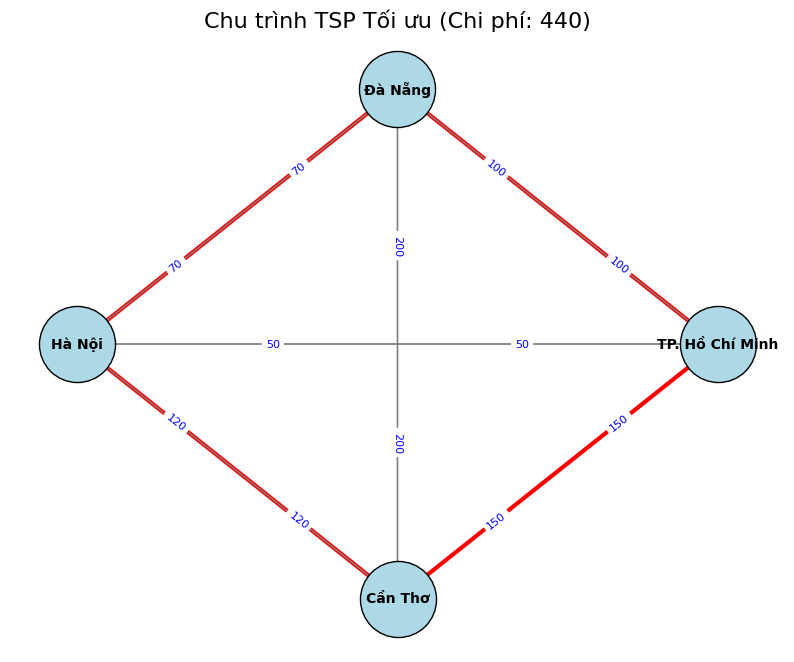

In [18]:
import math
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from typing import List, Dict, Tuple, Optional

# Định nghĩa giá trị VÔ CÙNG (Inf)
INF = float('inf')

class HeldKarpTSP:
    """
    Lớp thực hiện thuật toán Held-Karp (Quy hoạch động) để giải TSP.
    """

    def __init__(self, cost_matrix: List[List[int]], ten_thanh_pho: Dict[int, str]):
        """Khởi tạo đối tượng HeldKarpTSP."""

        self.cost_matrix = cost_matrix
        self.ten_thanh_pho = ten_thanh_pho
        self.N = len(cost_matrix)

        # Các thuộc tính lưu trữ kết quả cuối cùng
        self.min_cost = INF
        self.optimal_path_goc: List[int] = []
        self.buoc_di_chuyen_goc: List[Dict] = []

        # Các thuộc tính nội bộ (internal state) cho DP
        self._dp: List[List[float]] = []        # Bảng DP: dp[mask][j] = chi phí tối thiểu
        self._prev: List[List[int]] = []        # Bảng truy vết: prev[mask][j] = đỉnh trước j
        self._goc_sang_moi: Dict[int, int] = {} # Ánh xạ Chỉ số Gốc -> Chỉ số DP (0, 1, 2...)
        self._moi_sang_goc: Dict[int, int] = {} # Ánh xạ Chỉ số DP -> Chỉ số Gốc
        self._COSTS_MOI: List[List[int]] = []   # Ma trận chi phí đã được sắp xếp lại

    def _tao_ma_tran_moi(self, start_node_index: int):
        """
        Tạo ánh xạ chỉ số và ma trận chi phí mới (COSTS_MOI)
        để đỉnh xuất phát (start_node_index) luôn là chỉ số 0 trong tính toán DP.
        """
        # 1. Ánh xạ Chỉ số Gốc sang Chỉ số Mới (0, 1, 2...)
        self._goc_sang_moi = {start_node_index: 0} # Đỉnh xuất phát luôn là 0 mới
        self._moi_sang_goc = {0: start_node_index}

        moi_index = 1
        for i in range(self.N):
            if i != start_node_index:
                self._goc_sang_moi[i] = moi_index
                self._moi_sang_goc[moi_index] = i
                moi_index += 1

        # 2. Tạo Ma trận Chi phí Mới (Sắp xếp lại)
        self._COSTS_MOI = [[0] * self.N for _ in range(self.N)]
        for i in range(self.N):
            for j in range(self.N):
                idx_moi_i = self._goc_sang_moi[i]
                idx_moi_j = self._goc_sang_moi[j]

                cost_value = self.cost_matrix[i][j]
                self._COSTS_MOI[idx_moi_i][idx_moi_j] = cost_value

    def _tinh_dp(self):
        """
        Thực hiện logic Quy hoạch động (DP) chính.
        """
        # Kích thước DP: (2^N) x N
        self._dp = [[INF] * self.N for _ in range(1 << self.N)]
        self._prev = [[-1] * self.N for _ in range(1 << self.N)]

        # Base case: Chi phí để đi từ 0 đến 0 (mask chỉ chứa 0) là 0
        self._dp[1][0] = 0

        # Lặp qua tất cả các tập con (mask)
        for mask in range(1, 1 << self.N):
            # Lặp qua đỉnh cuối cùng (j) trong tập con mask (j thuộc mask)
            for j in range(self.N):
                # Kiểm tra xem bit j có được bật trong mask không
                if not (mask & (1 << j)): continue

                # Tập con mask_pre: S\{j} (mask trừ đi đỉnh j)
                mask_pre = mask ^ (1 << j)
                if mask_pre == 0: continue

                # Lặp qua đỉnh trước đó (i) (i thuộc mask_pre)
                for i in range(self.N):
                    if mask_pre & (1 << i):
                        # Công thức DP: D(S, j) = min_{i in S\{j}} { D(S\{j}, i) + cost(i, j) }
                        cost_new = self._dp[mask_pre][i] + self._COSTS_MOI[i][j]

                        if cost_new < self._dp[mask][j]:
                            self._dp[mask][j] = cost_new
                            # Lưu lại đỉnh trước đó (i) để truy vết
                            self._prev[mask][j] = i

    def _tim_chu_trinh_toi_thieu(self) -> int:
        """
        Tìm chi phí tối thiểu của chu trình sau khi tính toán DP.
        Trả về chỉ số mới (moi_index) của đỉnh cuối cùng (last_node_moi).
        """
        final_mask = (1 << self.N) - 1 # Tập con chứa tất cả các đỉnh
        self.min_cost = INF
        last_node_moi = -1

        # Lặp qua tất cả các đỉnh j (trừ đỉnh 0 mới)
        for j in range(1, self.N):
            # Tổng chi phí chu trình: D(final_mask, j) + cost(j, 0)
            cost_cycle = self._dp[final_mask][j] + self._COSTS_MOI[j][0]
            if cost_cycle < self.min_cost:
                self.min_cost = cost_cycle
                last_node_moi = j

        return last_node_moi

    def _truy_vet(self, last_node_moi: int, final_mask: int):
        """
        Truy vết ngược từ kết quả DP để tìm chu trình tối ưu.
        """
        optimal_path_moi_idx = []
        current_mask = final_mask
        current_node_moi = last_node_moi
        buoc_di_chuyen_moi = []

        # 1. Bước quay về đỉnh xuất phát (0 mới)
        buoc_di_chuyen_moi.append({'from': last_node_moi, 'to': 0, 'cost': self._COSTS_MOI[last_node_moi][0]})
        optimal_path_moi_idx.append(0)

        # 2. Truy vết ngược chu trình
        while current_node_moi != -1:
            optimal_path_moi_idx.append(current_node_moi)
            prev_node_moi = self._prev[current_mask][current_node_moi]

            if prev_node_moi != -1:
                cost_step = self._COSTS_MOI[prev_node_moi][current_node_moi]
                buoc_di_chuyen_moi.append({'from': prev_node_moi, 'to': current_node_moi, 'cost': cost_step})

            # Chuyển sang tập con mask trước đó
            current_mask ^= (1 << current_node_moi)
            current_node_moi = prev_node_moi

        optimal_path_moi_idx.reverse()

        # 3. Chuyển đổi chỉ số mới sang chỉ số gốc và tên thành phố
        self.optimal_path_goc = [self._moi_sang_goc[idx] for idx in optimal_path_moi_idx]

        self.buoc_di_chuyen_goc = []
        buoc_di_chuyen_moi.reverse() # Đảo ngược để có trình tự di chuyển từ đầu đến cuối

        for buoc_moi in buoc_di_chuyen_moi:
            from_goc = self._moi_sang_goc[buoc_moi['from']]
            to_goc = self._moi_sang_goc[buoc_moi['to']]

            self.buoc_di_chuyen_goc.append({
                'from_idx': from_goc,
                'to_idx': to_goc,
                'from': self.ten_thanh_pho.get(from_goc),
                'to': self.ten_thanh_pho.get(to_goc),
                'cost': buoc_moi['cost']
            })

    def thuc_hien_held_karp(self, start_node_index: int) -> Tuple[float, List[Dict]]:
        """
        Phương thức điều phối chính chạy thuật toán Held-Karp.
        """
        # 1. Thiết lập lại chỉ số và ma trận chi phí
        self._tao_ma_tran_moi(start_node_index)

        # 2. Tính toán Quy hoạch động
        self._tinh_dp()

        # 3. Tìm chi phí tối thiểu và đỉnh cuối cùng
        last_node_moi = self._tim_chu_trinh_toi_thieu()

        # 4. Truy vết nếu tìm thấy chu trình
        if self.min_cost != INF:
            final_mask = (1 << self.N) - 1
            self._truy_vet(last_node_moi, final_mask)

        return self.min_cost, self.buoc_di_chuyen_goc

# --- Hàm hỗ trợ Đọc file và Vẽ đồ thị (Giữ nguyên) ---

def doc_ma_tran_chi_phi(duong_dan_file):
    """Đọc ma trận chi phí từ file."""
    try:
        ma_tran = np.loadtxt(duong_dan_file, dtype=int)
        if ma_tran.ndim != 2 or ma_tran.shape[0] != ma_tran.shape[1]:
            raise ValueError("Ma trận chi phí không hợp lệ (Không phải ma trận vuông).")
        return ma_tran.tolist()
    except Exception as e:
        print(f"Lỗi khi đọc file '{duong_dan_file}': {e}")
        return None

def ve_do_thi_tsp(cost_matrix: List[List[int]], buoc_di_chuyen_goc: List[Dict], ten_thanh_pho: Dict):
    """
    Vẽ đồ thị có trọng số và đánh dấu chu trình tối ưu.
    """
    N = len(cost_matrix)
    G = nx.DiGraph()

    labels = {i: ten_thanh_pho.get(i, str(i)) for i in range(N)}
    G.add_nodes_from(labels.keys())

    path_edges = set()
    for buoc in buoc_di_chuyen_goc:
        path_edges.add((buoc['from_idx'], buoc['to_idx']))

    edge_list = []
    edge_colors = []
    edge_labels = {}

    for i in range(N):
        for j in range(N):
            weight = cost_matrix[i][j]
            if i != j and weight > 0 and weight < INF and weight < 99999:
                G.add_edge(i, j, weight=weight)
                edge_list.append((i, j))
                edge_labels[(i, j)] = weight

                if (i, j) in path_edges:
                    edge_colors.append('red')
                else:
                    edge_colors.append('gray')

    plt.figure(figsize=(10, 8))
    pos = nx.circular_layout(G)

    nx.draw_networkx_nodes(G, pos, node_size=3000, node_color='lightblue', edgecolors='black')
    nx.draw_networkx_labels(G, pos, labels=labels, font_size=10, font_weight='bold')

    nx.draw_networkx_edges(
        G, pos, edgelist=edge_list, edge_color=edge_colors,
        width=[3.0 if c == 'red' else 1.0 for c in edge_colors],
        arrowstyle='->', arrowsize=20
    )

    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, label_pos=0.3, font_size=8, font_color='blue')

    plt.title(f"Chu trình TSP Tối ưu (Chi phí: {sum(b['cost'] for b in buoc_di_chuyen_goc)})", fontsize=16)
    plt.axis('off')
    plt.show()

# --- Phần Main (Thực thi chương trình) ---

if __name__ == '__main__':

    # Giả định file chi phí đã được tạo ở bước trước
    FILE_CHI_PHI = "/content/chiphi.txt"
    TEN_THANH_PHO = {
        0: "TP. Hồ Chí Minh",
        1: "Đà Nẵng",
        2: "Hà Nội",
        3: "Cần Thơ"
    }

    print("==================================================")
    print("  ỨNG DỤNG TSP (OOP) - TÌM CHU TRÌNH TỐI ƯU (HELD-KARP) ")
    print("==================================================")

    # 1. Đọc Ma trận Chi phí
    COSTS = doc_ma_tran_chi_phi(FILE_CHI_PHI)
    if COSTS is None:
        exit()

    danh_sach_chi_so = list(TEN_THANH_PHO.keys())

    # 2. Yêu cầu nhập Đỉnh xuất phát (Tương tác)
    print(" DANH SÁCH CÁC THÀNH PHỐ:")
    for chi_so, ten in sorted(TEN_THANH_PHO.items()):
        print(f"   [{chi_so}]: {ten}")

    try:
        range_indices = f"{min(danh_sach_chi_so)} đến {max(danh_sach_chi_so)}"
        START_NODE_INPUT = input(f" Nhập CHỈ SỐ ĐỈNH XUẤT PHÁT ({range_indices}): ")
        START_NODE = int(START_NODE_INPUT)

        if START_NODE not in danh_sach_chi_so:
             raise ValueError("Chỉ số nằm ngoài phạm vi.")

    except ValueError as e:
        print(f"\nLỗi: Đầu vào không hợp lệ. {e}")
        exit()

    ten_xuat_phat = TEN_THANH_PHO.get(START_NODE)
    print(f"\n Vị trí Xuất phát đã chọn: {ten_xuat_phat}")
    print("-" * 50)

    # 3. Khởi tạo đối tượng và chạy thuật toán
    tsp_solver = HeldKarpTSP(cost_matrix=COSTS, ten_thanh_pho=TEN_THANH_PHO)
    print("\nBẮT ĐẦU CHẠY THUẬT TOÁN HELD-KARP...")
    chi_phi_toi_thieu, buoc_di_chuyen_goc = tsp_solver.thuc_hien_held_karp(START_NODE)

    # 4. In kết quả và Vẽ đồ thị
    if chi_phi_toi_thieu == INF:
        print(" Không tìm thấy chu trình đi qua tất cả các thành phố.")
    else:
        chu_trinh_ten = [TEN_THANH_PHO.get(node) for node in tsp_solver.optimal_path_goc]

        print("\n--- KẾT QUẢ TỔNG QUAN ---")
        print(f" Chi phí Tối thiểu của Chu trình: {chi_phi_toi_thieu}")
        print(f"Chu trình Tối ưu: {' -> '.join(chu_trinh_ten)}")
        print("\n--- CHI TIẾT ĐƯỜNG ĐI TỐI ƯU ---")

        for i, buoc in enumerate(buoc_di_chuyen_goc):
            print(f"Bước {i + 1}: Di chuyển từ {buoc['from']} đến {buoc['to']} (Chi phí: {buoc['cost']})")

        print("-" * 50)

        print("\n Đang tạo và hiển thị đồ thị với chu trình tối ưu...")
        ve_do_thi_tsp(COSTS, buoc_di_chuyen_goc, TEN_THANH_PHO)